In [4]:
# Systematic Exploratory Data Analysis
import import_ipynb
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer

#Understanding my variables

df= pd.read_csv("C:\\Users\\ajens\\Downloads\\Loan Prediction - Train (1).csv", na_values=['.'])
print(f'Shape: {df.shape}\n\n Head: {df.head}\n Column names: {df.columns}')


Shape: (614, 13)

 Head: <bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0      

In [2]:
# Return the number of unique values for each variable and describe.
print(f'Return the number of unique values for each variable:\n{df.nunique(axis=0)}')
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Return the number of unique values for each variable:
Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [3]:
# Find what you need to clean/Missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
# Remove redundant variables and variable selection via removing null values under threshold
# Remove rows with null values
df_cleaned = df.copy().drop(['Loan_ID'], axis=1)
NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the arbitrary threshold
    col_pass= []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdf_cleaned==df_cleaned[na_filter(NA_val)]
df_cleaned = df_cleaned.dropna(axis=0)
print(f'Before cleaning shape: {df.shape}\nAfter cleaing shape:   {df_cleaned.shape}')

Before cleaning shape: (614, 13)
After cleaing shape:   (480, 12)


In [5]:
# Replace missing values with the mean/median/mode of respective data

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace = True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace = True)
print(df.isnull().sum())
print(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Y

In [6]:
# Replace missing values with the mode of respective data for catagorical/Discrete data
def impute_nan_most_frequent_category_numeric(DataFrame,ColName):
# mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
# replace nan values with most occured category
     DataFrame[ColName] = DataFrame[ColName]
     DataFrame[ColName].fillna(most_frequent_category,inplace=True)


In [22]:
# Call function to impute most occured category
for Columns in ['Gender','Married','Dependents','Education','Self_Employed',\
           'Credit_History', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term']:
    impute_nan_most_frequent_category(df, Columns)
    
# Display imputed result
print(df.isnull().sum())
df.head(26)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [23]:
# Remove outliers. In this case removing data prior to 1800 since the recorded data for human observation 
# does not appear to be accuratly represented prior to this date. (This portion was done in
# Excel first, since Pythons datetime module only support AD dates)

print(df_cleaned['year'])
print(f'Shape after removing dates prior year 1800AD: {df_cleaned.shape}')
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

KeyError: 'year'

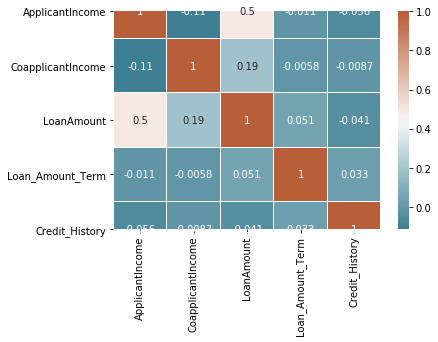

In [24]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,\
            cmap=sns.diverging_palette(220, 25, as_cmap=True), linewidth= .1, ax= ax)

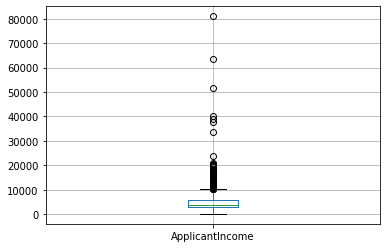

In [25]:
# Boxplot one variable at a time
df.boxplot("ApplicantIncome")

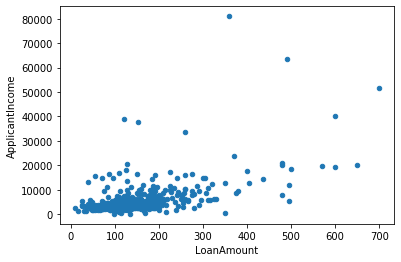

In [26]:
# Scatter plot with two variables
df.plot(kind='scatter', x='LoanAmount', y='ApplicantIncome')

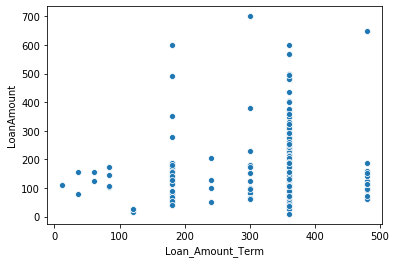

In [27]:
sns.scatterplot(x="Loan_Amount_Term", y="LoanAmount", data=df)

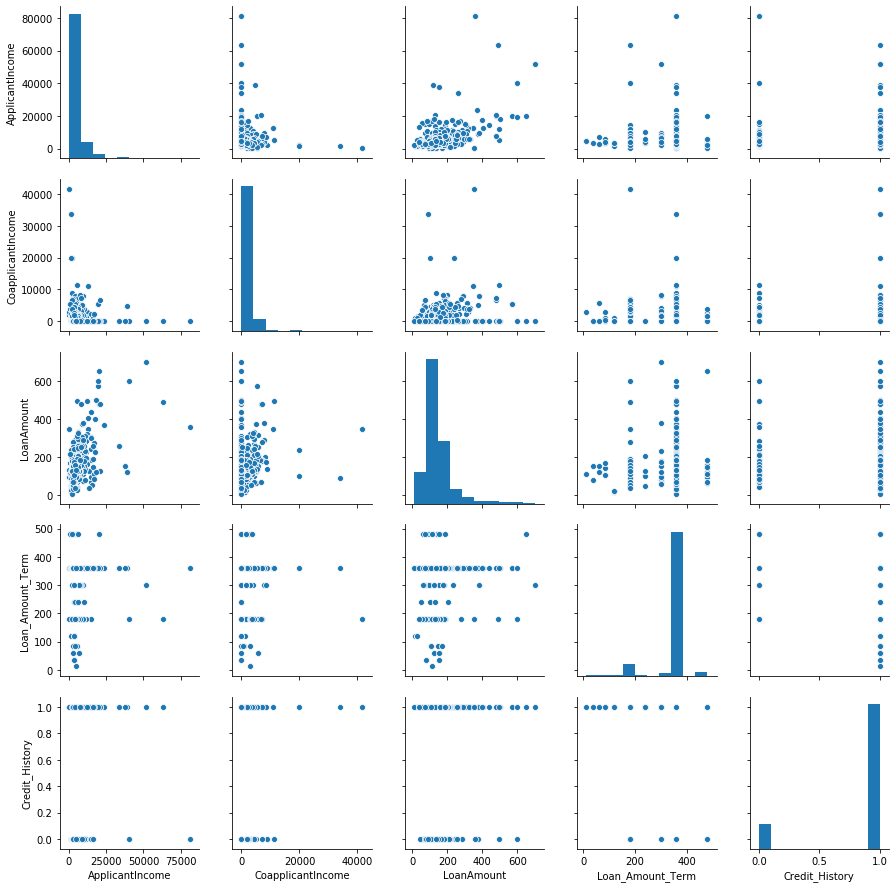

In [28]:
# Pair plot
sns.pairplot(df)

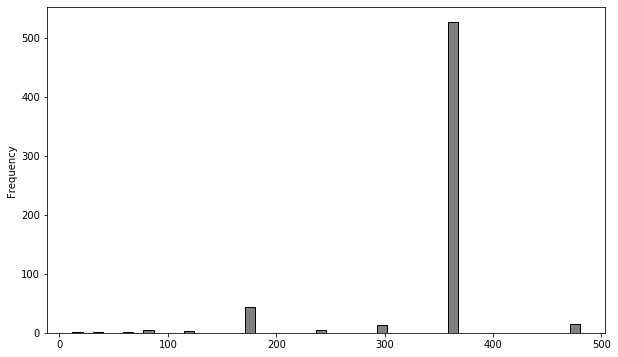

In [29]:
## Show distribution for Continuous variables

df['Loan_Amount_Term'].plot(kind='hist', bins=50, figsize=(10,6),\
    facecolor='grey',edgecolor='black')

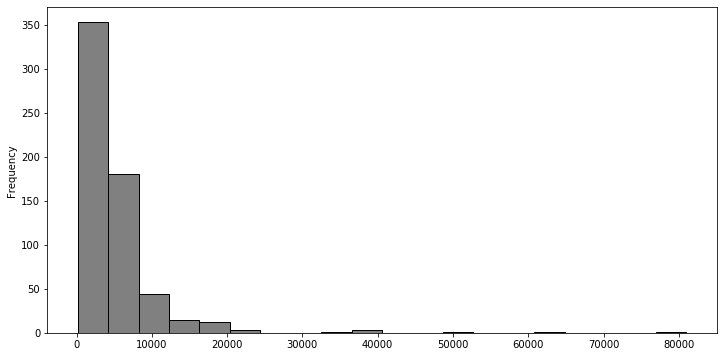

In [30]:
df['ApplicantIncome'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [31]:
# Catagorical/Discrete Variables

def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3),)
    plt.bar(varValue.index, varValue, color=['c', 'm', 'b', 'g'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))


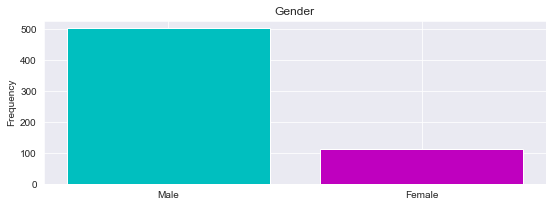

Gender:
Male      502
Female    112
Name: Gender, dtype: int64


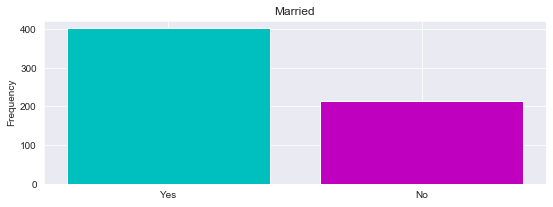

Married:
Yes    401
No     213
Name: Married, dtype: int64


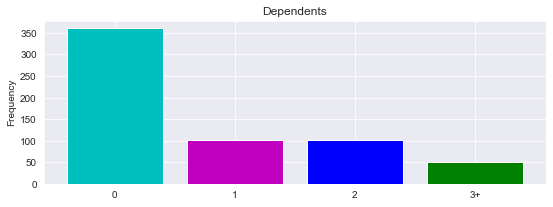

Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


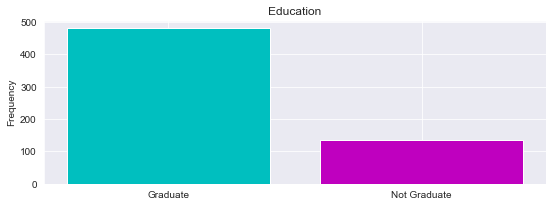

Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


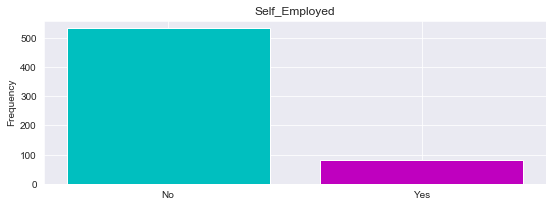

Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


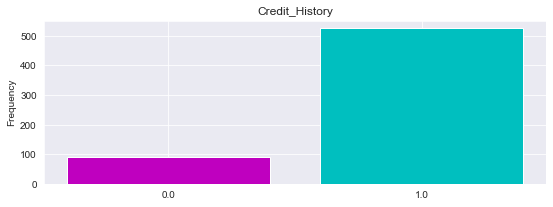

Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


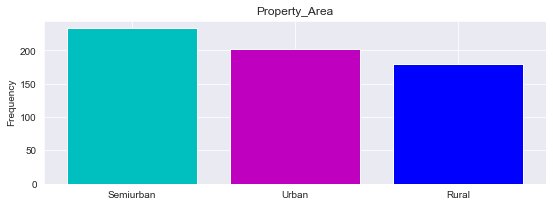

Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


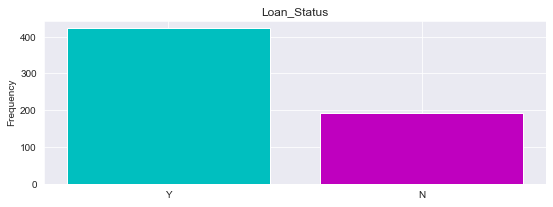

Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64


In [32]:
sns.set_style('darkgrid')
categorical_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',\
                        'Credit_History', 'Property_Area', 'Loan_Status']
for c in categorical_variables:
    bar_plot(c)

In [76]:
# Change categorical column into a numeric value
dfls= []
for i in df['Loan_Status']:
    if i== "Y":
        i=1
        dfls.append(i)
    else:
        b=0
        dfls.append(b)
        

print(dfls)
print(len(dfls))

print(f'Percentage of Accepted Loan Status (Y) to Rejected(N):\n{df.Loan_Status.value_counts(normalize= True)*100}')



[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 

In [78]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


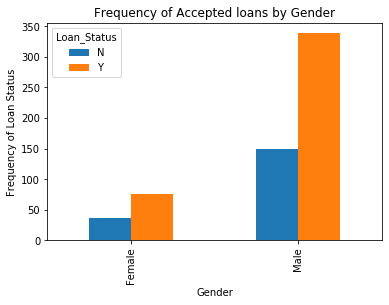

In [5]:
# Show graph of Target variable compared to another catagorical variable

pd.crosstab(df.Gender, df.Loan_Status).plot(kind='bar')
plt.title('Frequency of Accepted loans by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Loan Status')


df.groupby('Loan_Status').count()

Text(0, 0.5, 'Frequency of Loan Status')

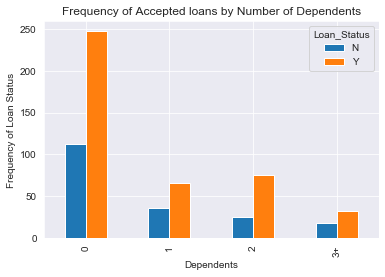

In [125]:
pd.crosstab(df.Dependents,df.Loan_Status).plot(kind='bar')
plt.title('Frequency of Accepted loans by Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency of Loan Status')


ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          192.0  0.572917  0.495948  0.0   
Y                      360.0  480.0          422.0  0.983412  0.127872  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]